In [ ]:
%%html
<marquee style='width: 50%; color: blue;'><b>Welcome to Obesity Analysis!</b></marquee>

#**PROJECT OBJECTIVE**
Over study is motivated by the goal of understanding obesity better, identifying high risk individuals and creating appropriate outreach and wellbeing programs for disease intervention. In this project , we are going to analyze obesity and discover its impact factors from age, family history, eating habits, alcohol consumption, smoking, etc.

# **DATA CLEANING**

In [ ]:
!pip install scikit-plot
!pip install umap-learn
!pip install kmodes

In [ ]:
from kmodes.kprototypes import KPrototypes
import umap
import scikitplot as skplt
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly
plotly.offline.init_notebook_mode()
from pylab import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import MDS
from sklearn.manifold import TSNE

In [ ]:
#import dataset
df = pd.read_csv("https://raw.githubusercontent.com/Sihoon-Daniel/Kooniang/main/ObesityDataSet_raw_and_data_sinthetic.csv")

In [ ]:
df.head()

Gender   Age  Height  ...        CALC                 MTRANS           NObeyesdad
0  Female  21.0    1.62  ...          no  Public_Transportation        Normal_Weight
1  Female  21.0    1.52  ...   Sometimes  Public_Transportation        Normal_Weight
2    Male  23.0    1.80  ...  Frequently  Public_Transportation        Normal_Weight
3    Male  27.0    1.80  ...  Frequently                Walking   Overweight_Level_I
4    Male  22.0    1.78  ...   Sometimes  Public_Transportation  Overweight_Level_II

[5 rows x 17 columns]

In [ ]:
df.shape

(2111, 17)

In [ ]:
#drop off Height and weight, since Nobeyesdad is leveled based on BMI.
df_new= df.drop(columns=['Height','Weight'])
df_new

Gender        Age  ...                 MTRANS           NObeyesdad
0     Female  21.000000  ...  Public_Transportation        Normal_Weight
1     Female  21.000000  ...  Public_Transportation        Normal_Weight
2       Male  23.000000  ...  Public_Transportation        Normal_Weight
3       Male  27.000000  ...                Walking   Overweight_Level_I
4       Male  22.000000  ...  Public_Transportation  Overweight_Level_II
...      ...        ...  ...                    ...                  ...
2106  Female  20.976842  ...  Public_Transportation     Obesity_Type_III
2107  Female  21.982942  ...  Public_Transportation     Obesity_Type_III
2108  Female  22.524036  ...  Public_Transportation     Obesity_Type_III
2109  Female  24.361936  ...  Public_Transportation     Obesity_Type_III
2110  Female  23.664709  ...  Public_Transportation     Obesity_Type_III

[2111 rows x 15 columns]

In [ ]:
#drop duplicates
df_new.drop_duplicates(inplace=True)

In [ ]:
df_new.shape

(2082, 15)

In [ ]:
#check for null
df_new.isnull().sum()

Gender                            0
Age                               0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2082 non-null   object 
 1   Age                             2082 non-null   float64
 2   family_history_with_overweight  2082 non-null   object 
 3   FAVC                            2082 non-null   object 
 4   FCVC                            2082 non-null   float64
 5   NCP                             2082 non-null   float64
 6   CAEC                            2082 non-null   object 
 7   SMOKE                           2082 non-null   object 
 8   CH2O                            2082 non-null   float64
 9   SCC                             2082 non-null   object 
 10  FAF                             2082 non-null   float64
 11  TUE                             2082 non-null   float64
 12  CALC                            20

In [ ]:
# seperate the dataset based on the datatype
df_n=df_new.select_dtypes('number')
df_c=df_new.select_dtypes('object')

In [ ]:
df_ohe=pd.get_dummies(df_c)

In [ ]:
df_final=pd.concat([df_n, df_ohe], axis=1)
df_final.head(3)

Age  FCVC  ...  NObeyesdad_Overweight_Level_I  NObeyesdad_Overweight_Level_II
0  21.0   2.0  ...                              0                               0
1  21.0   3.0  ...                              0                               0
2  23.0   2.0  ...                              0                               0

[3 rows x 36 columns]

#**EDA**

##**Target Variable Overview**

In [ ]:
# Setting plot figuresize
sns.set(rc = {'figure.figsize':(15,8)})

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

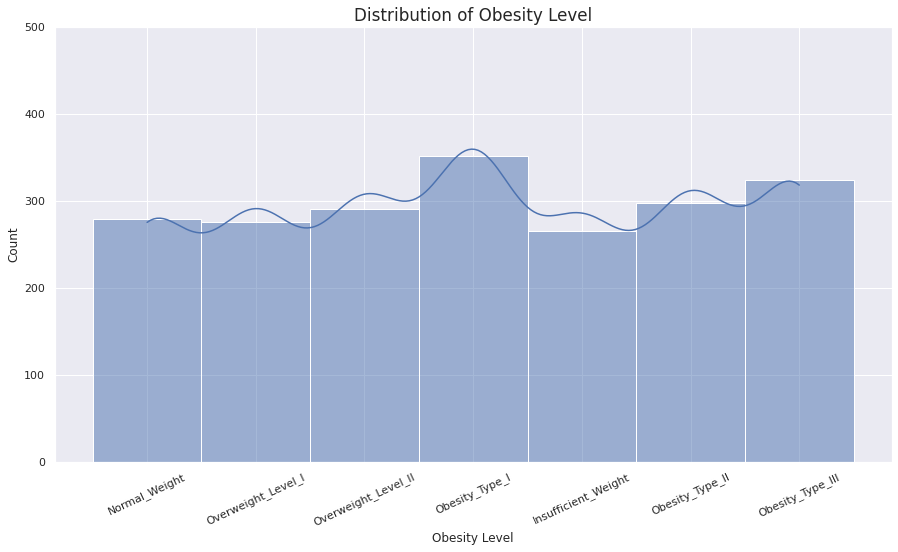

In [ ]:
# Histogram of our Target Variable
sns.histplot(data=df_new,x='NObeyesdad',kde=True)
sns.set(font_scale=1.4)
plt.ylim(0,500)
plt.title('Distribution of Obesity Level')
plt.xlabel('Obesity Level')
plt.xticks(rotation=25)

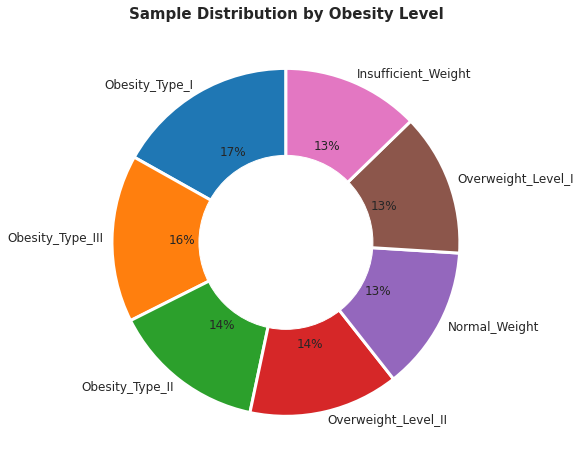

In [ ]:
#set age as interg
df1=df_new
df1['Age']=df1['Age'].astype(int)

#sample distribution by obesity level
Nobeyesdad_rank = df_new.groupby('NObeyesdad').size().to_frame('count').sort_values(by='count', ascending=False).reset_index()
plt.pie(Nobeyesdad_rank['count'],labels=Nobeyesdad_rank.NObeyesdad,startangle=90, labeldistance=1.05,\
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },\
        colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#008080'],\
        textprops={'fontsize': 12},autopct='%1.0f%%')
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Sample Distribution by Obesity Level', fontdict= {'fontsize':15, 'fontweight':'bold'})
plt.show()

##**Overall Feature Exploration**

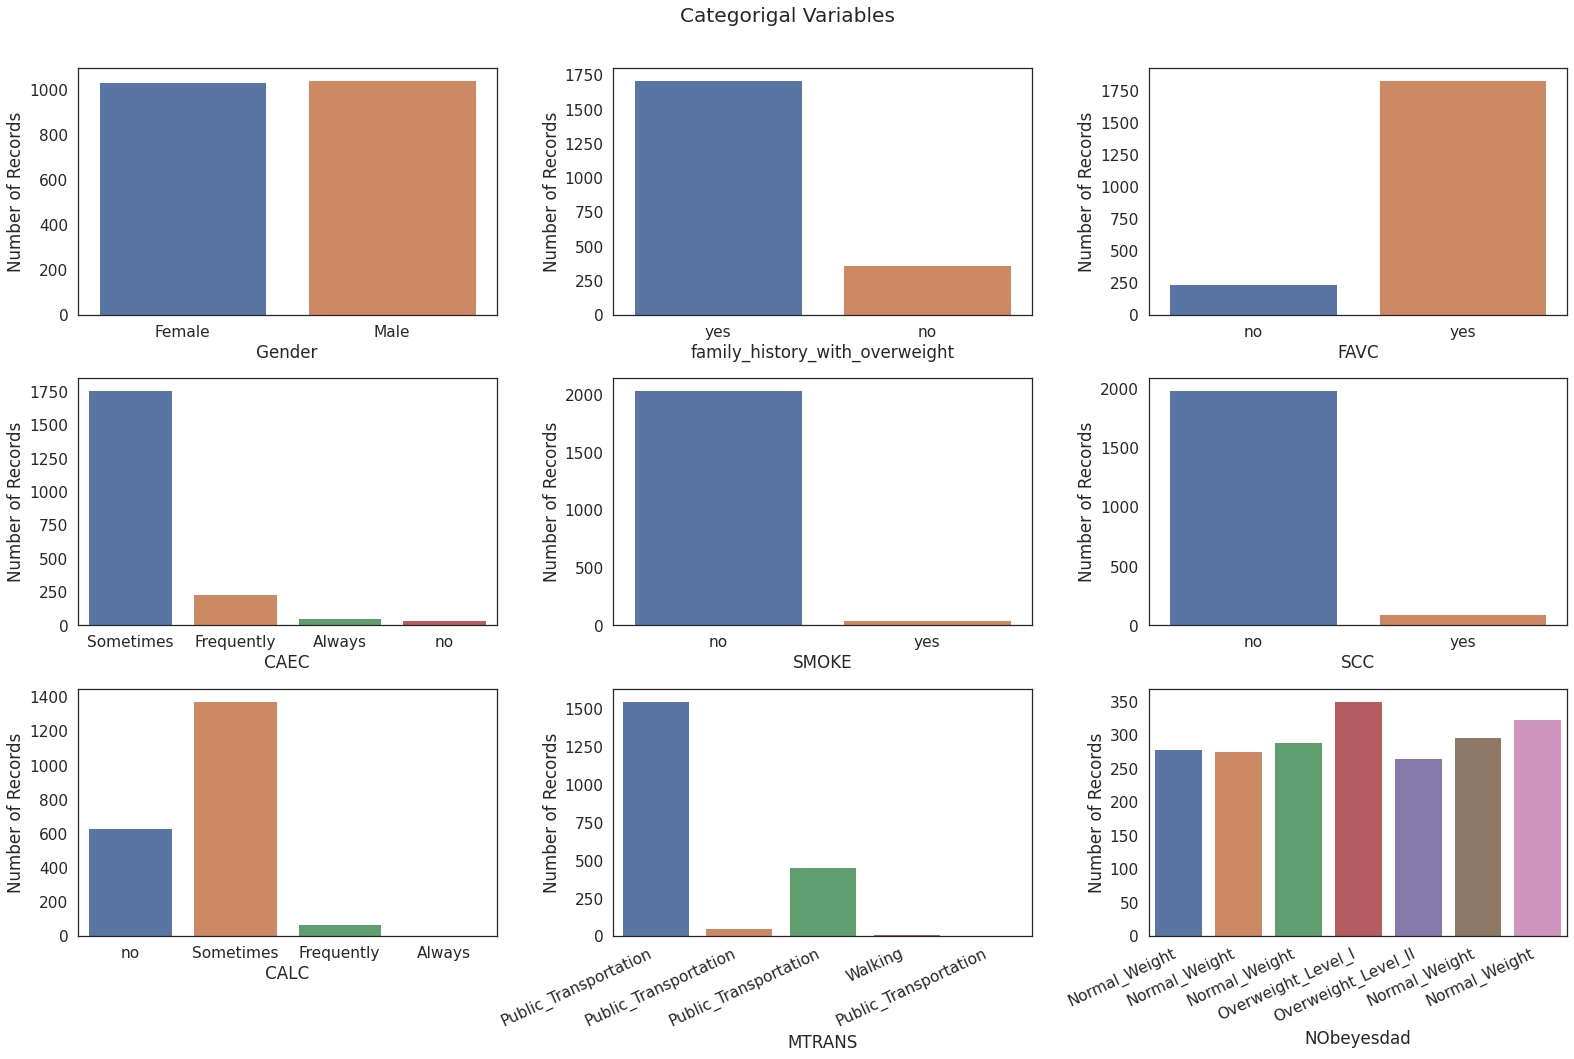

In [ ]:

sns.set(font_scale=1.4)

sns.set_style('white')
# categorical variable exploration
columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
           'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

fig, ax = plt.subplots(3, 3, figsize=(24, 16))
for col, subplot in zip(columns, ax.flatten()):
    sns.countplot(x=df_new[col], ax=subplot)
    
    if col=="MTRANS":
        sns.countplot(x=df_new[col],ax=subplot)
        subplot.set_xticklabels(rotation=25, horizontalalignment='right', labels=df_new.MTRANS)        
        subplot.yaxis.label.set_text("Number of Records")
    elif col=="NObeyesdad":
        sns.countplot(x=df_new[col],ax=subplot)
        subplot.set_xticklabels(rotation=25, horizontalalignment='right', labels=df_new.NObeyesdad)  
        subplot.yaxis.label.set_text("Number of Records")
    else:
        sns.countplot(x=df_new[col],ax=subplot)  
        subplot.yaxis.label.set_text("Number of Records")
        
# show figure & plots
fig.suptitle("Categorigal Variables", fontdict= {'fontsize':20, 'fontweight':'bold'})
plt.tight_layout(pad=5, w_pad=0.0, h_pad=1)
plt.show();

Text(0.5, 1.0, 'Which features are the most correlated? \n')

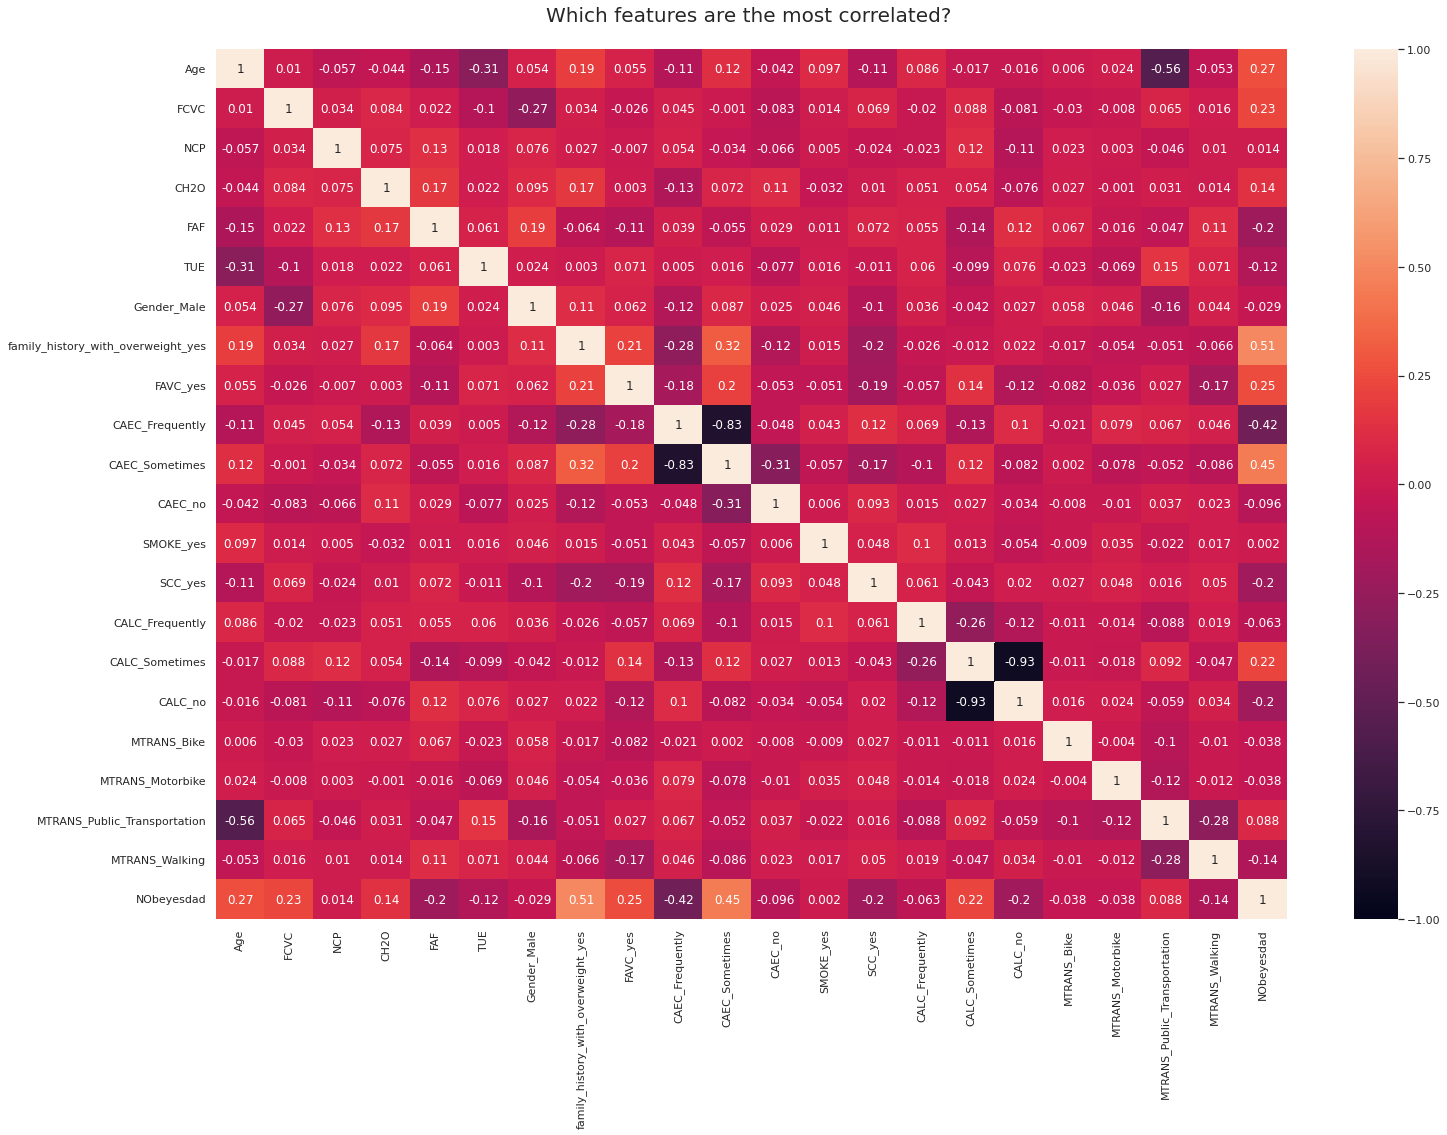

In [ ]:
sns.set(font_scale=1)

dummies = ["Gender","family_history_with_overweight","FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"]
df_dum = pd.get_dummies(df_new, columns= dummies,drop_first=True)

# In case we just one to translate one column of yes and no into 1 and 0
# df = pd.Series(np.where(df.WhateverColumn.values == 'yes', 1, 0), df.index)

# Translating our target variable values into numerical values (1 being the least obese and 7 being the highest obese) 
Obe = df_new['NObeyesdad']
df_dum = df_dum.drop(columns=['NObeyesdad'])
df_dum.insert(loc=21, column='NObeyesdad', value=Obe)

cleanup_nums = {"NObeyesdad":{ "Insufficient_Weight": 1, "Normal_Weight": 2, "Overweight_Level_I": 3, "Overweight_Level_II": 4,"Obesity_Type_I": 5,
                              "Obesity_Type_II": 6, "Obesity_Type_III": 7}}
df_dum = df_dum.replace(cleanup_nums)

# Correlation Heatmap
plt.figure(figsize=(24, 16))
sns.heatmap(round(df_dum.corr(),3),vmin=-1,vmax=1,annot=True,)
plt.title("Which features are the most correlated? \n", fontsize=20)

##**Detailed Feature Exploration**

In [ ]:
#create pivot table for barplot
df_new.pivot_table(values='FCVC', index=['Gender','FAVC'], columns='NObeyesdad', aggfunc='mean')

NObeyesdad   Insufficient_Weight  ...  Overweight_Level_II
Gender FAVC                       ...                     
Female no               2.756134  ...             2.420716
       yes              2.434895  ...             2.438878
Male   no               3.000000  ...             2.159840
       yes              2.356764  ...             2.168070

[4 rows x 7 columns]

In [ ]:
df_new['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

Text(0.5, 0, 'Obesity Level')

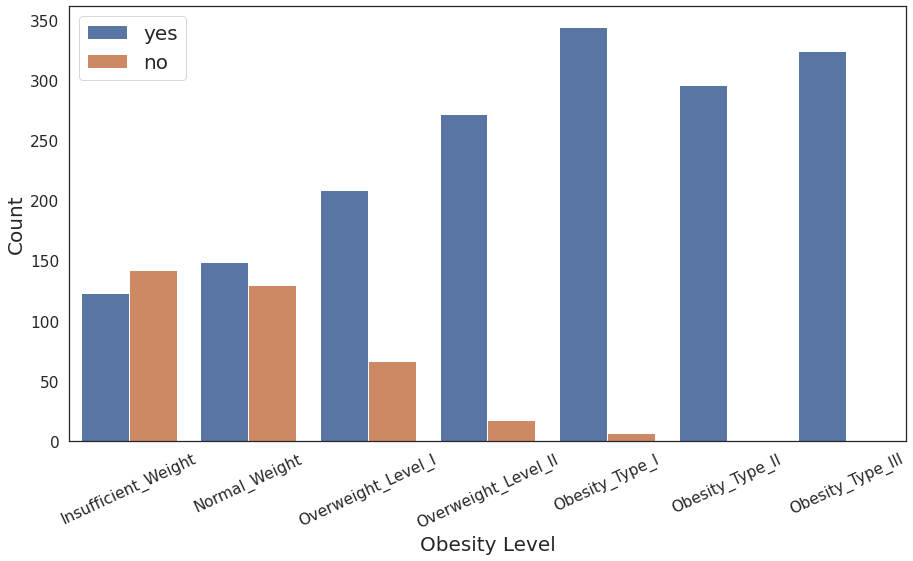

In [ ]:
#barplot to see how is the family history with overweight make an difference on our target variable 
sns.set(font_scale=1.4)
sns.set_style('white')
order = ['Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']

sns.countplot(data=df_new,x='NObeyesdad',hue='family_history_with_overweight',order=order)

plt.xticks(rotation=25)
plt.legend(loc='best',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xlabel('Obesity Level',fontsize=20)


Text(69.92505404040405, 0.5, 'Number of Main Meals')

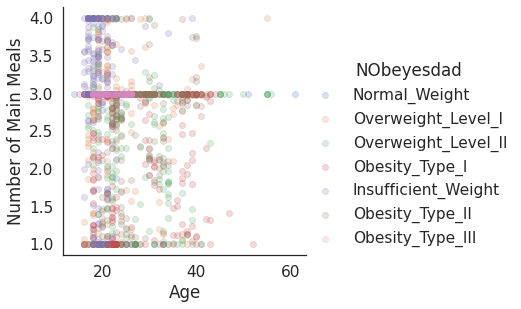

In [ ]:
#number of main meals vs age for all body type people
g = sns.PairGrid(df_new, y_vars=["NCP"], x_vars=["Age"], height=4.5, hue="NObeyesdad", aspect=1.1)
ax = g.map(plt.scatter, alpha=0.2)
g.add_legend()
plt.ylabel('Number of Main Meals')


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 9 Text major ticklabel objects>)

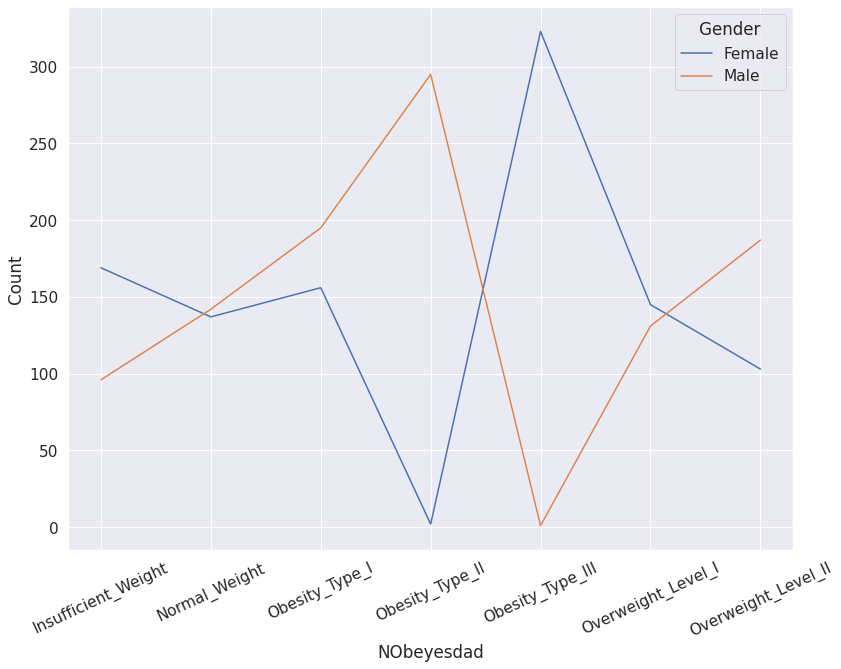

In [ ]:
#lineplot to see how gender make an difference on the target variable 
sns.set({"figure.figsize":(13,10)})  
df_new.pivot_table('Age', index='NObeyesdad', columns='Gender', aggfunc='count').plot()
plt.ylabel('Count')
plt.xticks(rotation=25)

Text(92.59375, 0.5, 'Obesity Level')

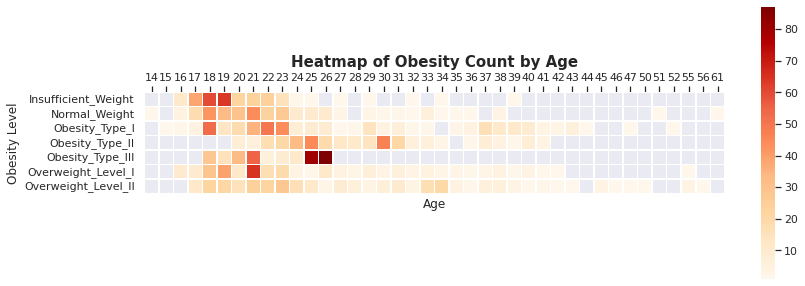

In [ ]:
#heatmap of obesity count by Age
sns.set(font_scale=1)
sns.set({"figure.figsize":(13,10)})  
Age_obesity = df_new.groupby(['NObeyesdad','Age']).NObeyesdad.aggregate('count').unstack()
Age_obesity
ax = sns.heatmap(Age_obesity,square=True,annot=False,fmt="d",cmap="OrRd",linewidths=0.5,cbar_kws={"shrink": 0.5}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of Obesity Count by Age', fontdict= {'fontsize':15, 'fontweight':'bold'})
plt.ylabel('Obesity Level')

Text(0.5, 0, '\n Obesity Level')

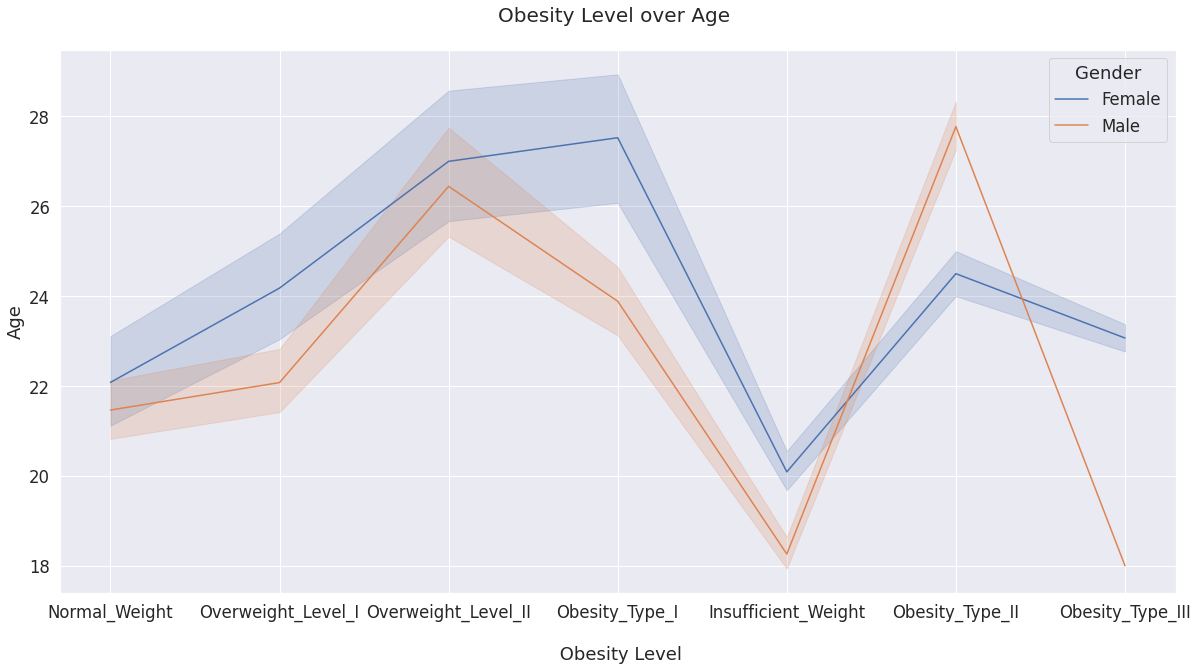

In [ ]:
#lineplot of the obesity level over age per gender
sns.set(font_scale=1.5)
plt.figure(figsize= (20,10))
fig1 = sns.lineplot(data=df_new, x='NObeyesdad', y='Age', hue='Gender')
plt.title('Obesity Level over Age \n', fontsize=20)
plt.xlabel('\n Obesity Level')

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

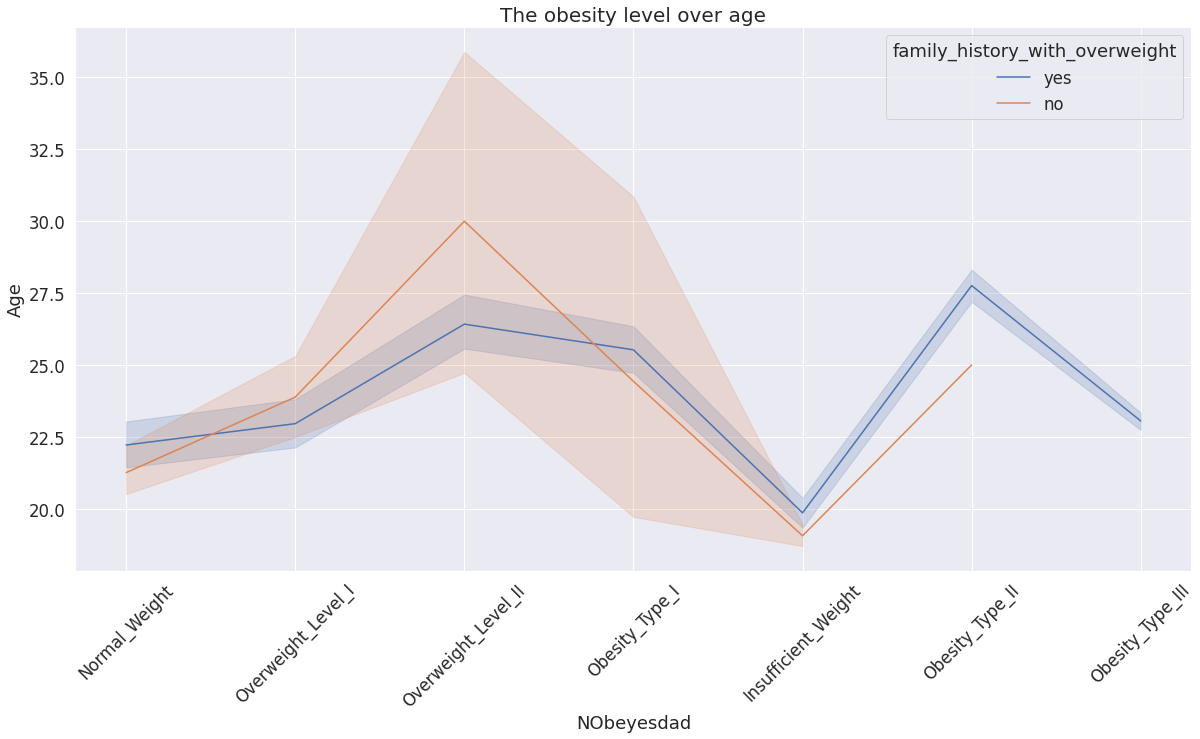

In [ ]:
#lineplot of the obesity level over age per family history 
plt.figure(figsize= (20,10))
fig1 = sns.lineplot(data=df_new, x='NObeyesdad', y='Age', hue='family_history_with_overweight')
plt.title('The obesity level over age', fontsize=20)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

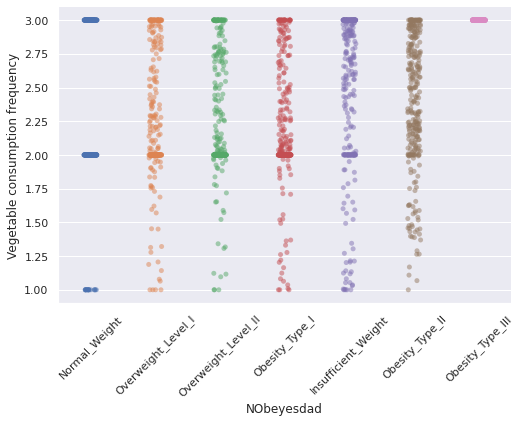

In [ ]:
sns.set(rc={'figure.figsize':(10,15)})
sns.catplot(data=df_new, y='FCVC',x='NObeyesdad',alpha=0.5, aspect=1.5)
plt.ylabel('Vegetable consumption frequency')

plt.legend
plt.xticks(rotation=45)

#**CLUSTERING MODEL**

##**Data Preprocessing for Clustering**

In [ ]:
df_n.head(3)

Age  FCVC  NCP  CH2O  FAF  TUE
0  21.0   2.0  3.0   2.0  0.0  1.0
1  21.0   3.0  3.0   3.0  3.0  0.0
2  23.0   2.0  3.0   2.0  2.0  1.0

In [ ]:
df_ohe.head(3)

Gender_Female  ...  NObeyesdad_Overweight_Level_II
0              1  ...                               0
1              1  ...                               0
2              0  ...                               0

[3 rows x 30 columns]

In [ ]:
scaler = StandardScaler()
scaled_final_n = scaler.fit_transform(df_n)
scaled_final_c = scaler.fit_transform(df_ohe)

In [ ]:
scaled_final_c.shape

(2082, 30)

In [ ]:
scaled_final_n.shape

(2082, 6)

In [ ]:
scaled_final=np.concatenate((scaled_final_c,scaled_final_n), axis=1)
scaled_final.shape

(2082, 36)

In [ ]:
pd.DataFrame(scaled_final)

0         1         2   ...        33        34        35
0     1.005780 -1.005780 -0.461064  ... -0.007035 -1.185046  0.552392
1     1.005780 -1.005780 -0.461064  ...  1.636412  2.330014 -1.092353
2    -0.994253  0.994253 -0.461064  ... -0.007035  1.158327  0.552392
3    -0.994253  0.994253  2.168896  ... -0.007035  1.158327 -1.092353
4    -0.994253  0.994253  2.168896  ... -0.007035 -1.185046 -1.092353
...        ...       ...       ...  ...       ...       ...       ...
2077  1.005780 -1.005780 -0.461064  ... -0.453824  0.779016  0.398192
2078  1.005780 -1.005780 -0.461064  ...  0.001396  0.386643 -0.106707
2079  1.005780 -1.005780 -0.461064  ...  0.082028  0.471964 -0.029374
2080  1.005780 -1.005780 -0.461064  ...  1.393739  0.149631 -0.128475
2081  1.005780 -1.005780 -0.461064  ...  1.412103  0.017634  0.082220

[2082 rows x 36 columns]

##**Hierarchical Clustering**

In [ ]:
#eiclidean distance for numeric data
euc = pdist(scaled_final_n,metric='euclidean')

In [ ]:
#jaccard distance for categorical ohe data
jac = pdist(scaled_final_c,metric='jaccard')

In [ ]:
#review the shape
print(euc.shape)
print(jac.shape)

(2166321,)
(2166321,)


In [ ]:
#combine
dmat=euc+jac

In [ ]:
dmat

array([4.81195734, 2.49764427, 3.88186977, ..., 1.38475343, 1.42127715,
       0.27227178])

In [ ]:
suqareddist=squareform(dmat)

In [ ]:
dmat.shape


(2166321,)

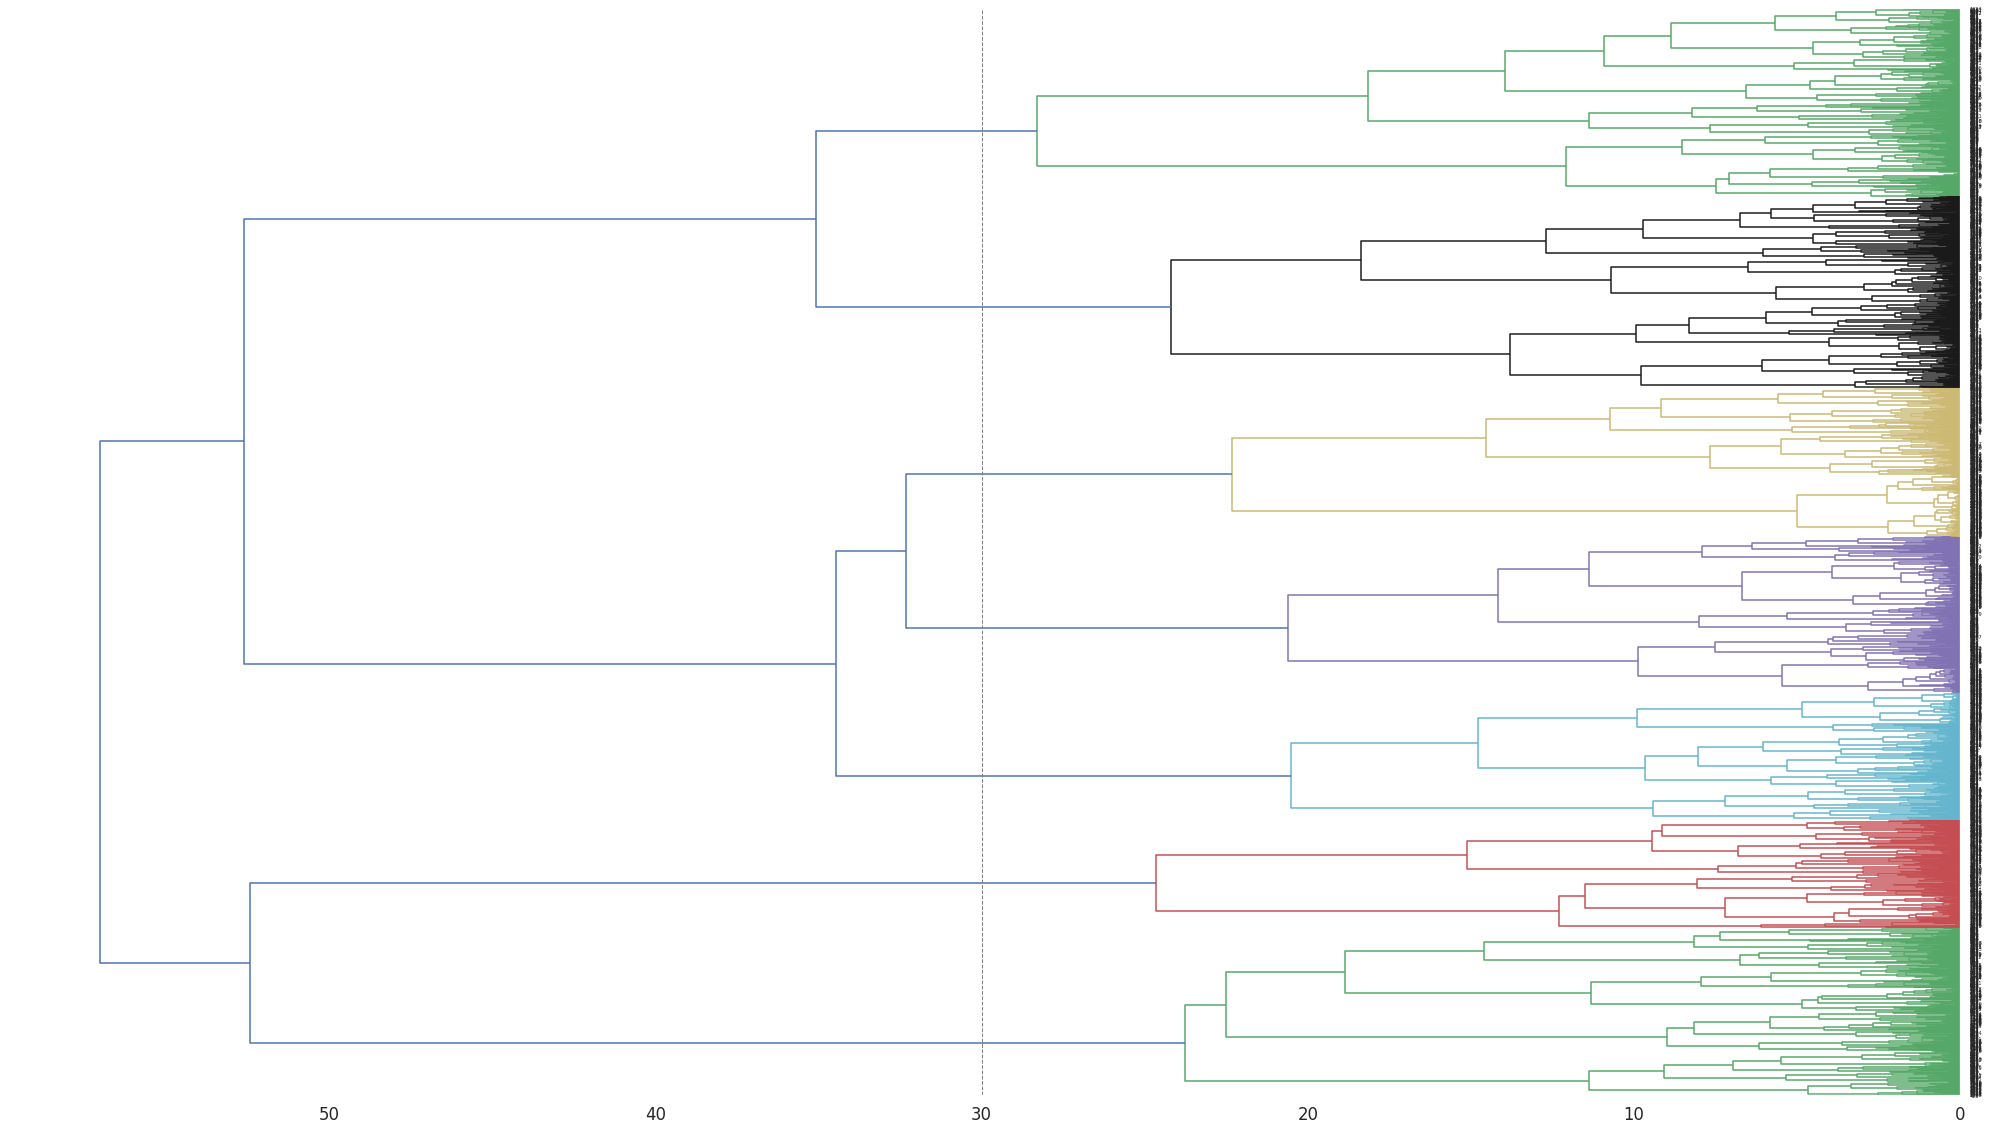

In [ ]:
#first hcluster
hc1 = linkage(dmat,method='ward')
type(hc1)

# our first dendrogram
DIST = 30
fig = plt.figure(figsize=(35, 20))
dendrogram(hc1, 
           orientation = "left", 
           color_threshold = DIST)
plt.axvline(x=DIST, c='grey', lw=1, linestyle='dashed')
plt.show()

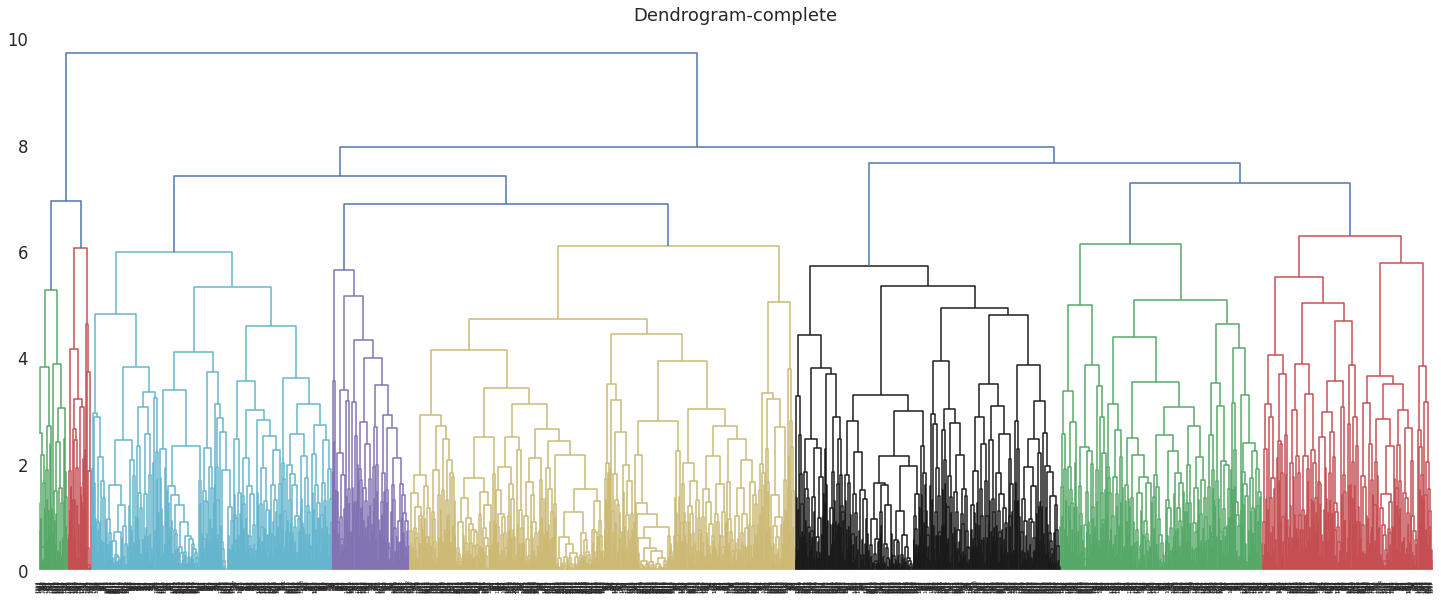

In [ ]:
#Second hcluster
hc2 = linkage(dmat,method='complete')
type(hc2)

# our second dendrogram
fig = plt.figure(figsize=(25, 10))
dendrogram(hc2)
plt.title('Dendrogram-complete')
plt.show()

##**K-means Clustering**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



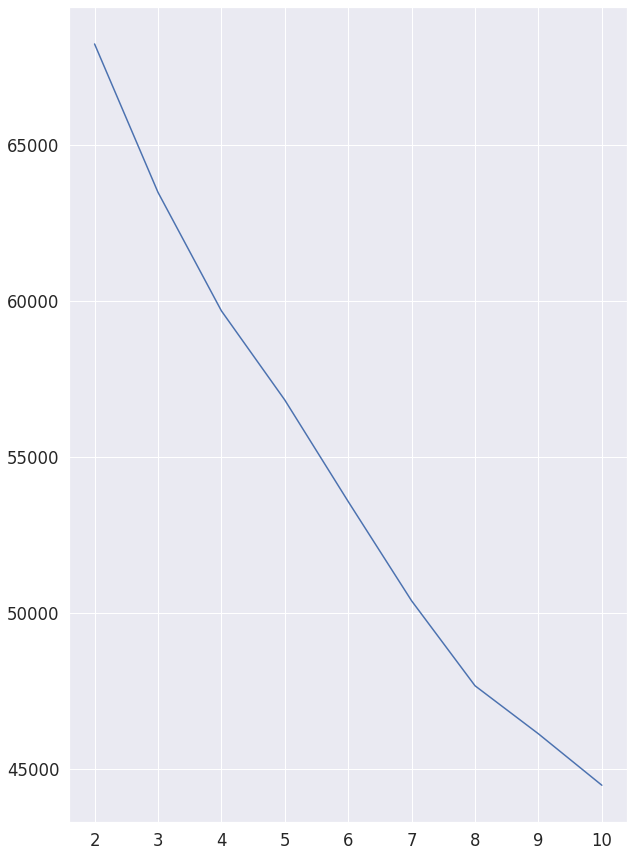

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



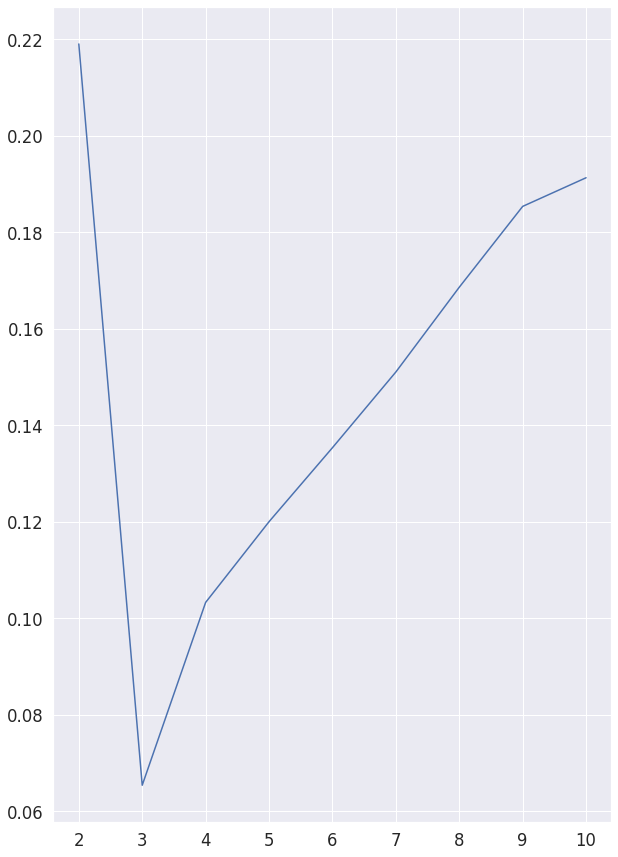

In [ ]:
#kmean
KRANGE = range(2, 11)

# create a container
ss = []
avg_silo=[]

for k in KRANGE:
    km = KMeans(k)
    lab = km.fit_predict(scaled_final)
    avg_silo.append(metrics.silhouette_score(scaled_final, km.predict(scaled_final)))
    ss.append(km.inertia_)

sns.lineplot(KRANGE, ss)
plt.show()

sns.lineplot(KRANGE,avg_silo)
plt.show()

In [ ]:
k8 = KMeans(n_clusters= 8)
 
#predict the labels of clusters.
labels = k8.fit_predict(scaled_final)

In [ ]:
#df['lab_k8'] = labels
#df


###**Demensional Reduction**

In [ ]:
#Step1 - PCA demensional reducation due to the silhouette_score looks bad
pca = PCA()
pcs = pca.fit_transform(scaled_final)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



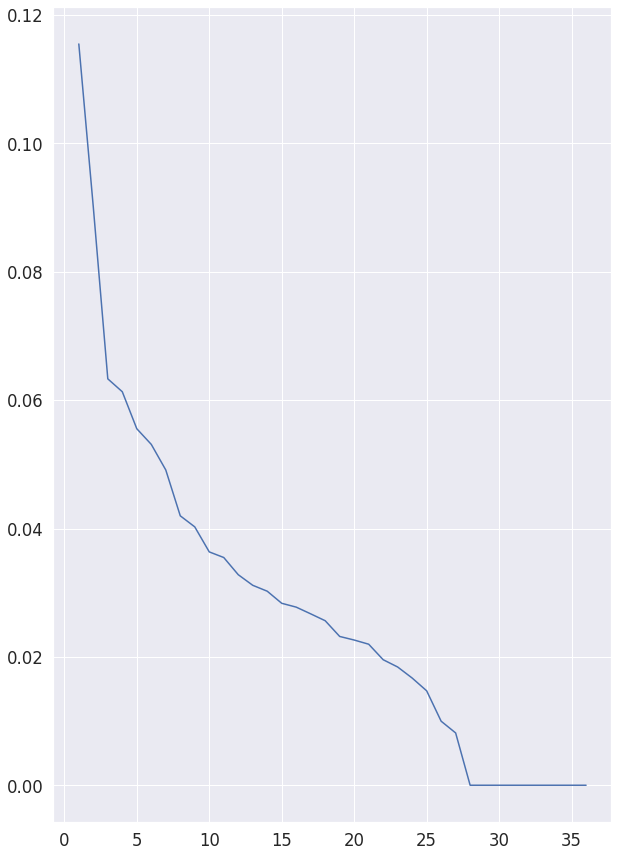

In [ ]:
varexp = pca.explained_variance_ratio_

sns.lineplot(range(1, len(varexp) + 1), varexp)

In [ ]:
pca = PCA(27)
pcs = pca.fit_transform(scaled_final)

In [ ]:
# dementional reduction step 2 -- tsne 
tsne = TSNE()
tsne.fit(pcs)

# get the embeddings
te = tsne.embedding_
# the shape
te.shape
# 2d tsne
tdata = pd.DataFrame(te, columns=['e1', 'e2'])
tdata.head(3)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



e1         e2
0   9.833855   4.375425
1 -54.092743 -22.800344
2  18.118723  17.439304

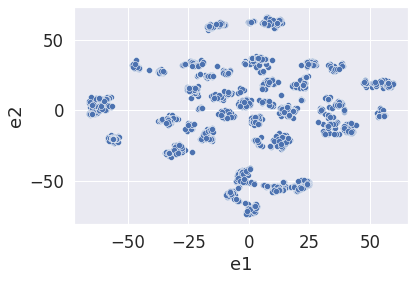

In [ ]:
# the plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x="e1", y="e2", data=tdata, legend="full")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



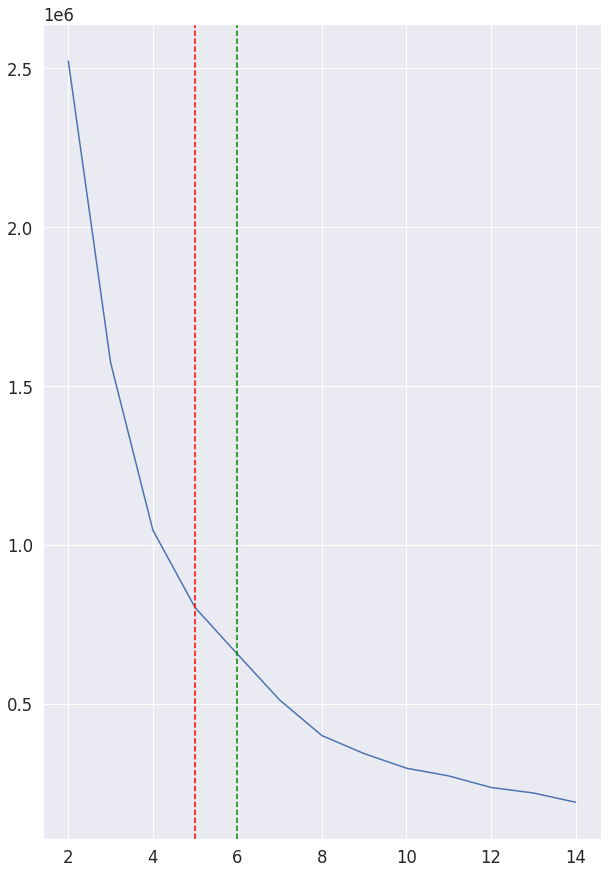

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



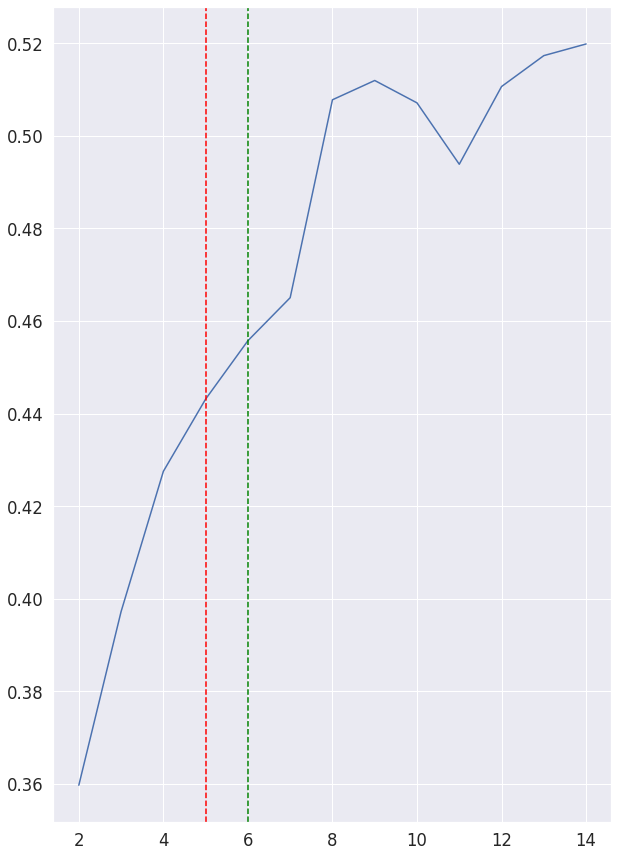

In [ ]:
#kmean
KRANGE = range(2, 15)

# create a container
ss2 = []
avg_silo2=[]

for k in KRANGE:
    kmtsne = KMeans(k)
    lab = kmtsne.fit_predict(tdata)
    avg_silo2.append(metrics.silhouette_score(tdata, kmtsne.predict(tdata)))
    ss2.append(kmtsne.inertia_)

sns.lineplot(KRANGE, ss2)
plt.axvline(x = 5, linestyle = 'dashed', color = 'red')
plt.axvline(x = 6, linestyle = 'dashed', color = 'green')
plt.show()

sns.lineplot(KRANGE,avg_silo2)
plt.axvline(x = 5, linestyle = 'dashed', color = 'red')
plt.axvline(x = 6, linestyle = 'dashed', color = 'green')
plt.show()


In [ ]:
k5 = KMeans(n_clusters= 5)
 
#predict the labels of clusters.
lab_5 = k5.fit_predict(tdata)

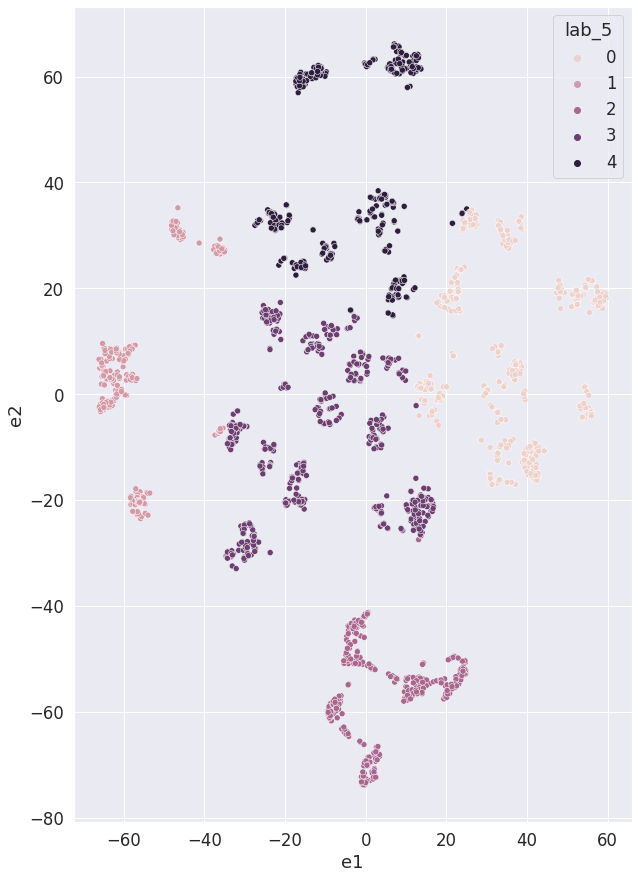

In [ ]:
tdata['lab_5'] = lab_5
sns.scatterplot(data = tdata, x = 'e1', y='e2', hue = 'lab_5')

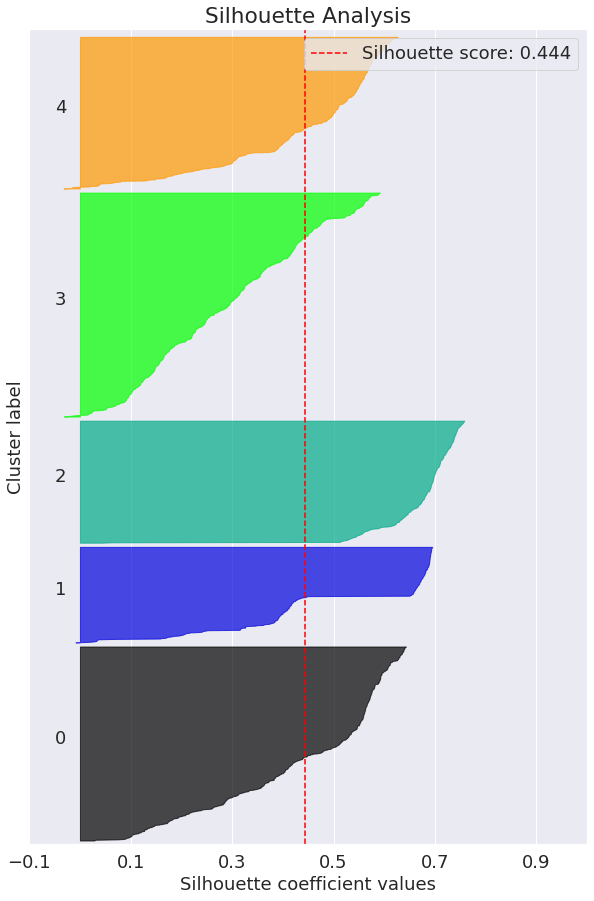

In [ ]:
skplt.metrics.plot_silhouette(tdata, lab_5)

## **Kprototypes Clustering**

In [ ]:
kprot_data = df_new.drop(columns='NObeyesdad',axis=1)
kprot_data.head()

Gender  Age  ...        CALC                 MTRANS
0  Female   21  ...          no  Public_Transportation
1  Female   21  ...   Sometimes  Public_Transportation
2    Male   23  ...  Frequently  Public_Transportation
3    Male   27  ...  Frequently                Walking
4    Male   22  ...   Sometimes  Public_Transportation

[5 rows x 14 columns]

In [ ]:
kprot_data.shape

(2082, 14)

In [ ]:
#Pre-processing
for c in kprot_data.select_dtypes(exclude='object').columns:
    sc = StandardScaler()
    kprot_data[c] =  sc.fit_transform(np.array(kprot_data[c]).reshape(-1, 1))

categorical_columns = [0, 2, 3, 6, 7, 9, 12, 13] #make sure to specify correct indices



In [ ]:
Elbow plot with cost (will take a LONG time)
costs = []
n_clusters = []
clusters_assigned = []

for i in range(2, 15):
    try:
        kproto = KPrototypes(n_clusters= i, init='Cao')
        clusters = kproto.fit_predict(kprot_data, categorical=categorical_columns)
        costs.append(kproto.cost_)
        n_clusters.append(i)
        clusters_assigned.append(clusters)
    except:
        print(f"Can't cluster with {i} clusters")


In [ ]:
print(n_clusters)
print(costs)

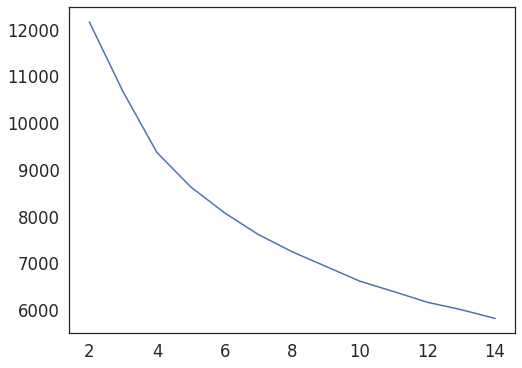

In [ ]:

sns.set_style('white')

plt.figure(figsize= (8,6))
sns.lineplot(x=n_clusters, y=costs)
plt.show()



In [ ]:
#Actual clustering
kproto = KPrototypes(n_clusters= 7, init='Cao', n_jobs = -1)
clusters = kproto.fit_predict(kprot_data, categorical=categorical_columns)

#Prints the count of each cluster group
pd.Series(clusters).value_counts()

4    336
5    325
2    314
1    287
3    281
0    271
6    268
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



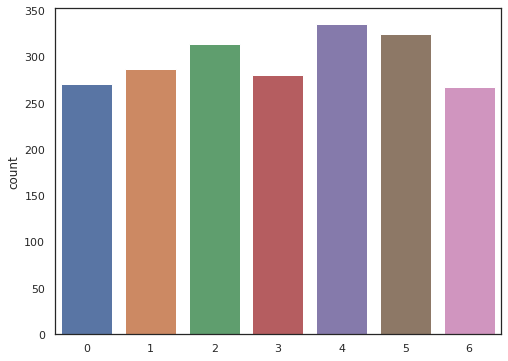

In [ ]:
sns.set_style('white')
plt.figure(figsize= (8,6))
sns.countplot(pd.Series(clusters))

In [ ]:
##Clustering Visualization using UMAP

#Preprocessing numerical
numerical = kprot_data.select_dtypes(exclude='object')

for c in numerical.columns:
    sc = StandardScaler()
    numerical.loc[:, c] = sc.fit_transform(np.array(numerical[c]).reshape(-1, 1))
    
##preprocessing categorical
categorical = kprot_data.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(kprot_data.select_dtypes(include='object').columns) / kprot_data.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='euclidean').fit(numerical)
fit2 = umap.UMAP(metric='jaccard').fit(categorical)


#Augmenting the numerical embedding with categorical
intersection = umap.umap_.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.umap_.reset_local_connectivity(intersection)
embedding = umap.umap_.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components, 
                                                fit1._initial_alpha, fit1._a, fit1._b, 
                                                fit1.repulsion_strength, fit1.negative_sample_rate, 
                                                200, 'random', np.random, fit1.metric, 
                                                fit1._metric_kwds, False,{},False)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



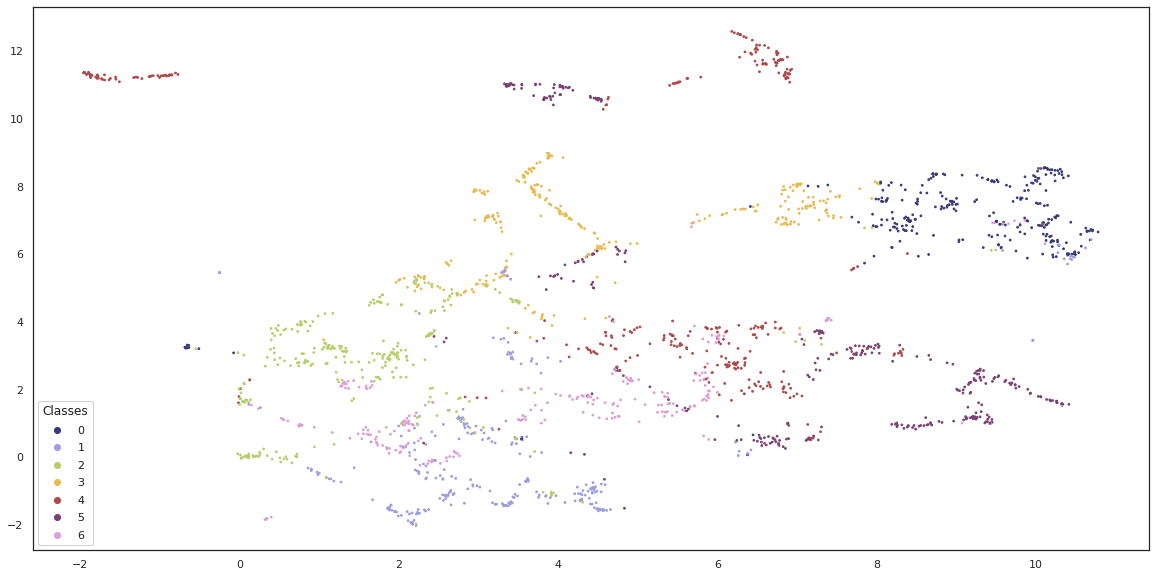

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches((20, 10))
scatter = ax.scatter((np.array(embedding)[0].T)[0], (np.array(embedding)[0].T)[1], s=3, c=clusters, cmap='tab20b', alpha=1.0)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(num=7),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

In [ ]:
#### Profiling

obesity = pd.get_dummies(df_new.drop(columns='NObeyesdad',axis=1))
obesity['kprot'] = clusters

In [ ]:
profile = obesity.groupby('kprot').mean()
profile

Age      FCVC  ...  MTRANS_Public_Transportation  MTRANS_Walking
kprot                       ...                                              
0      21.605166  2.376098  ...                      0.907749        0.033210
1      21.522648  1.873505  ...                      0.818815        0.027875
2      22.958599  1.927176  ...                      0.808917        0.015924
3      36.608541  2.374210  ...                      0.131673        0.010676
4      23.526786  2.948339  ...                      0.889881        0.014881
5      21.981538  2.933189  ...                      0.895385        0.027692
6      20.264925  2.405846  ...                      0.720149        0.059701

[7 rows x 29 columns]

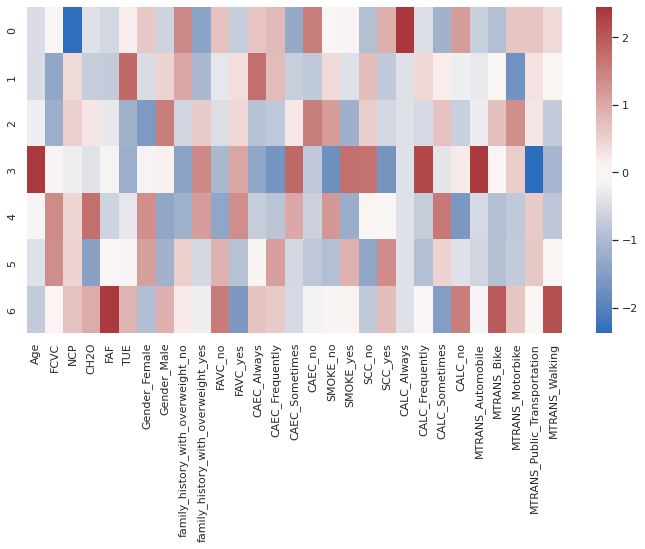

In [ ]:
# heatmap
sc = StandardScaler()
profile_scaled = sc.fit_transform(profile)

plt.figure(figsize=(12, 6))
pal = sns.color_palette("vlag", as_cmap=True)
sns.heatmap(profile_scaled, center=0, cmap=pal, xticklabels=profile.columns)

# **CLASSIFICATION PREDICTION**

### **Before Adding Clustering Label Feature**

In [ ]:
X = kprot_data
y = df_new['NObeyesdad']

In [ ]:
X.head()

Gender       Age  ...        CALC                 MTRANS
0  Female -0.476570  ...          no  Public_Transportation
1  Female -0.476570  ...   Sometimes  Public_Transportation
2    Male -0.160878  ...  Frequently  Public_Transportation
3    Male  0.470505  ...  Frequently                Walking
4    Male -0.318724  ...   Sometimes  Public_Transportation

[5 rows x 14 columns]

In [ ]:
X.shape

(2082, 14)

In [ ]:
y.shape

(2082,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
clusters_train = kproto.fit_predict(X_train, categorical=categorical_columns)

In [ ]:
clusters_test = kproto.fit_predict(X_test, categorical=categorical_columns)

In [ ]:
X_train.head()

Gender       Age  ...        CALC                 MTRANS
39    Female -0.476570  ...   Sometimes  Public_Transportation
1158    Male  4.890184  ...          no             Automobile
1080  Female  0.628350  ...  Frequently             Automobile
1319    Male  1.733270  ...   Sometimes             Automobile
1504  Female -0.950107  ...          no  Public_Transportation

[5 rows x 14 columns]

In [ ]:
dummies = ["Gender","family_history_with_overweight","FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"]
X_train = pd.get_dummies(X_train, columns= dummies,drop_first=True)
X_test = pd.get_dummies(X_test, columns= dummies,drop_first=True)

In [ ]:
X_train.head()

Age      FCVC  ...  MTRANS_Public_Transportation  MTRANS_Walking
39   -0.476570 -0.790434  ...                             1               0
1158  4.890184 -0.790434  ...                             0               0
1080  0.628350  1.082641  ...                             0               0
1319  1.733270  0.684779  ...                             0               0
1504 -0.950107 -0.191709  ...                             1               0

[5 rows x 21 columns]

In [ ]:
X_train.drop(columns='CALC_Frequently',axis=1,inplace=True)

In [ ]:
X_test.head()

Age      FCVC  ...  MTRANS_Public_Transportation  MTRANS_Walking
326  -0.950107  1.082641  ...                             1               0
520  -0.792261  1.082641  ...                             1               0
165   0.944042 -0.790434  ...                             1               0
836   1.101887  0.362983  ...                             0               0
2100  0.154813  1.082641  ...                             1               0

[5 rows x 20 columns]

#### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
y_pred_logreg = logreg.predict(X_test)

In [ ]:
LG_y_comparison=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_logreg})
LG_y_comparison.head(5)

Actual           Predicted
326         Normal_Weight     Obesity_Type_II
520   Insufficient_Weight  Overweight_Level_I
165       Obesity_Type_II     Obesity_Type_II
836    Overweight_Level_I  Overweight_Level_I
2100     Obesity_Type_III    Obesity_Type_III

In [ ]:
confusion_matrix(y_test, y_pred_logreg)

array([[32,  5,  2,  3,  0,  6,  0],
       [17, 17,  8,  5,  0,  3,  3],
       [ 5,  1, 46, 12,  1,  5,  2],
       [ 1,  1,  6, 60,  0,  1,  1],
       [ 1,  0,  0,  0, 63,  0,  0],
       [ 0,  7, 11,  4,  2, 21,  2],
       [ 2,  5, 20, 20,  4,  0, 12]])

In [ ]:
print(classification_report(y_test, y_pred_logreg))

                     precision    recall  f1-score   support

Insufficient_Weight       0.55      0.67      0.60        48
      Normal_Weight       0.47      0.32      0.38        53
     Obesity_Type_I       0.49      0.64      0.56        72
    Obesity_Type_II       0.58      0.86      0.69        70
   Obesity_Type_III       0.90      0.98      0.94        64
 Overweight_Level_I       0.58      0.45      0.51        47
Overweight_Level_II       0.60      0.19      0.29        63

           accuracy                           0.60       417
          macro avg       0.60      0.59      0.57       417
       weighted avg       0.60      0.60      0.58       417



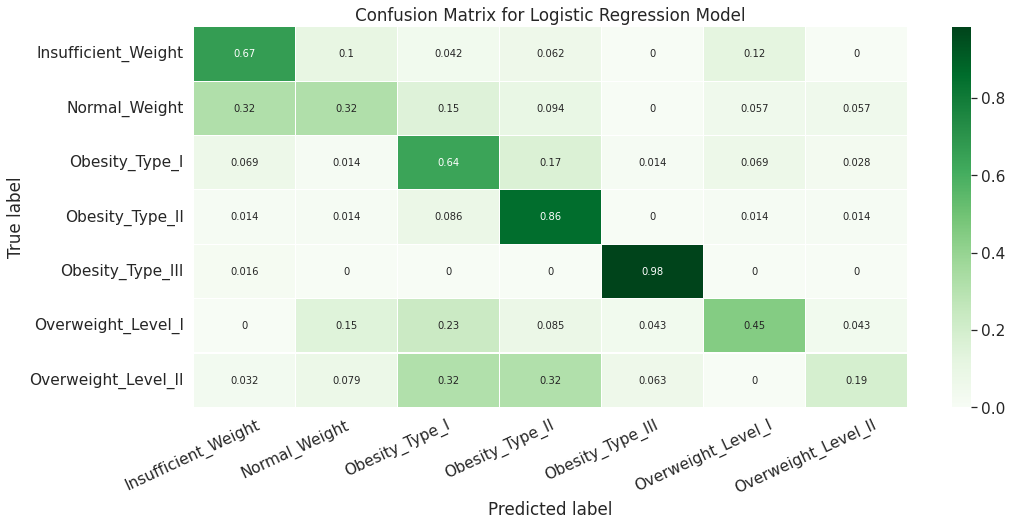

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_logreg)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Insufficient_Weight','Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

#### **Random Forest** -- Best Fit Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
X_train.shape

(1665, 20)

In [ ]:
X_test.shape

(417, 20)

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
RF_y_comparison=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_rf})
RF_y_comparison.head(5)

Actual            Predicted
326         Normal_Weight   Overweight_Level_I
520   Insufficient_Weight  Insufficient_Weight
165       Obesity_Type_II  Overweight_Level_II
836    Overweight_Level_I   Overweight_Level_I
2100     Obesity_Type_III     Obesity_Type_III

In [ ]:
confusion_matrix(y_test, y_pred_rf)

array([[42,  6,  0,  0,  0,  0,  0],
       [ 3, 38,  4,  2,  0,  4,  2],
       [ 1,  7, 53,  3,  0,  2,  6],
       [ 0,  1,  2, 65,  0,  0,  2],
       [ 0,  1,  0,  0, 63,  0,  0],
       [ 0,  8,  1,  0,  0, 38,  0],
       [ 1,  6,  4,  9,  0,  0, 43]])

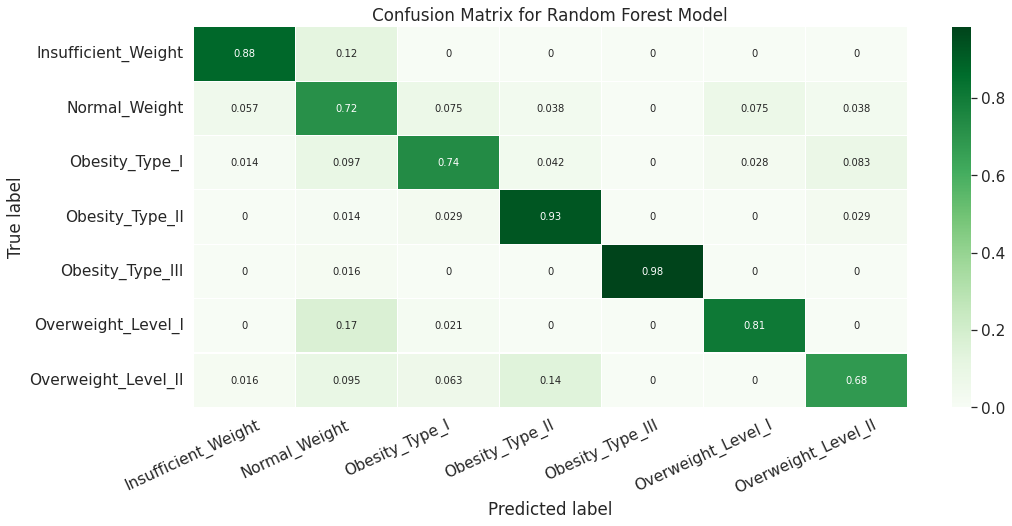

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_rf)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Insufficient_Weight','Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_rf))

                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.88      0.88        48
      Normal_Weight       0.57      0.72      0.63        53
     Obesity_Type_I       0.83      0.74      0.78        72
    Obesity_Type_II       0.82      0.93      0.87        70
   Obesity_Type_III       1.00      0.98      0.99        64
 Overweight_Level_I       0.86      0.81      0.84        47
Overweight_Level_II       0.81      0.68      0.74        63

           accuracy                           0.82       417
          macro avg       0.83      0.82      0.82       417
       weighted avg       0.83      0.82      0.82       417



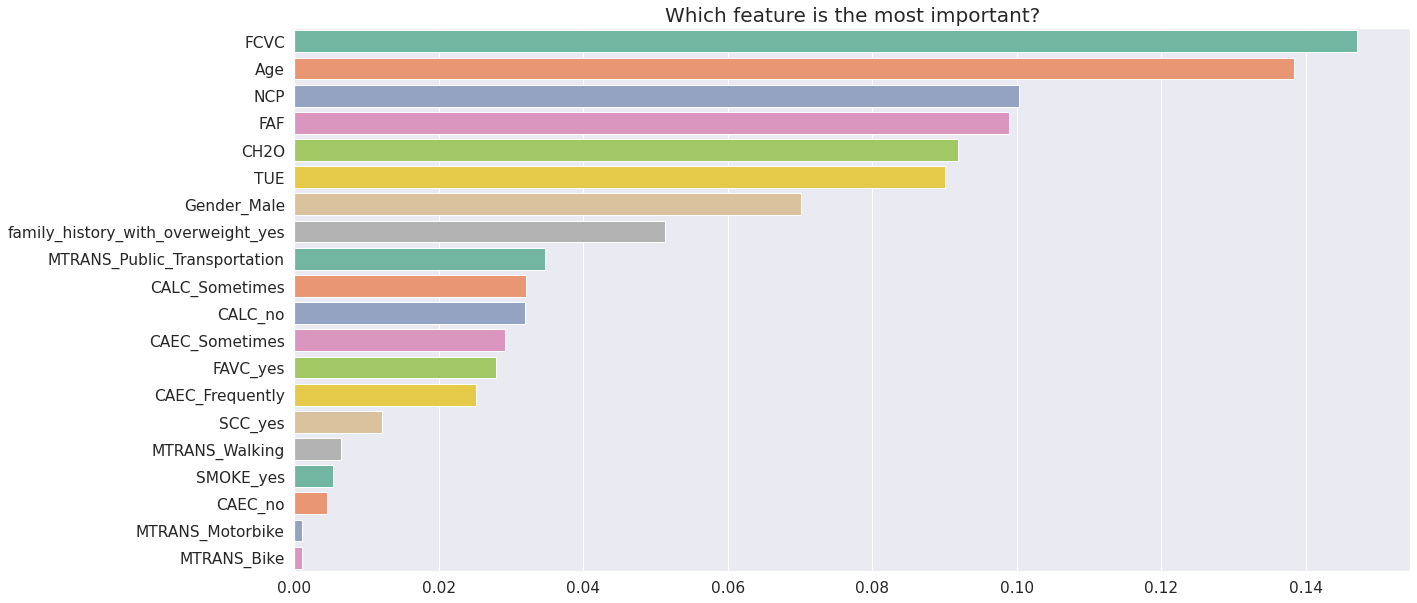

In [ ]:
# Plot features importances
imp = pd.Series(data=rf.feature_importances_, index=X_test.columns).sort_values(ascending=False)
plt.figure(figsize=(20,10))
plt.title("Which feature is the most important?", fontsize=20)
ax = sns.barplot(y=imp.index, x=imp.values, palette="Set2", orient='h')

#### **XGBoost**

In [ ]:
import xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
y_pred_xgb = xgb.predict(X_test)

In [ ]:
xgb_y_comparison=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_xgb})
xgb_y_comparison.head(5)

Actual            Predicted
326         Normal_Weight        Normal_Weight
520   Insufficient_Weight  Insufficient_Weight
165       Obesity_Type_II      Obesity_Type_II
836    Overweight_Level_I  Overweight_Level_II
2100     Obesity_Type_III     Obesity_Type_III

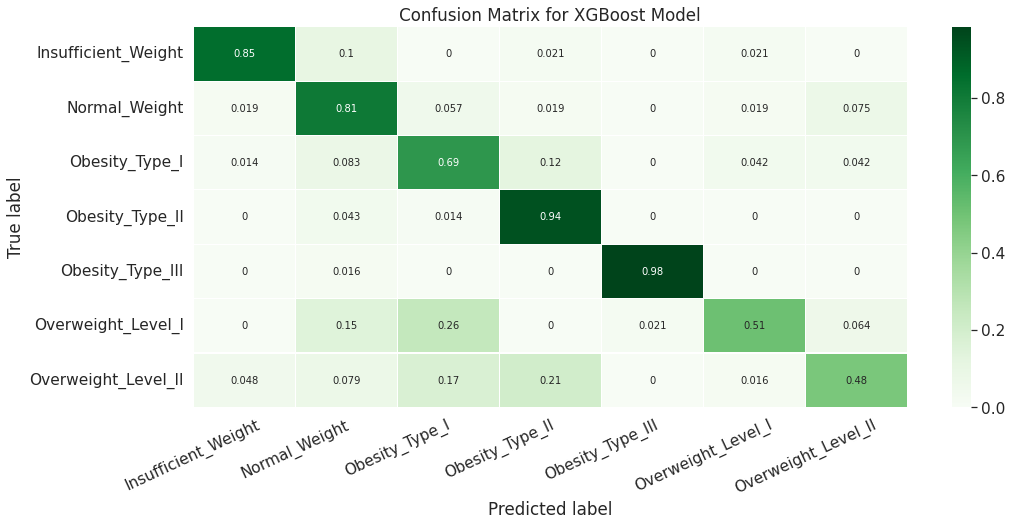

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_xgb)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Insufficient_Weight','Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_xgb))

                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.85      0.87        48
      Normal_Weight       0.61      0.81      0.70        53
     Obesity_Type_I       0.65      0.69      0.67        72
    Obesity_Type_II       0.73      0.94      0.83        70
   Obesity_Type_III       0.98      0.98      0.98        64
 Overweight_Level_I       0.80      0.51      0.62        47
Overweight_Level_II       0.75      0.48      0.58        63

           accuracy                           0.76       417
          macro avg       0.77      0.75      0.75       417
       weighted avg       0.77      0.76      0.75       417



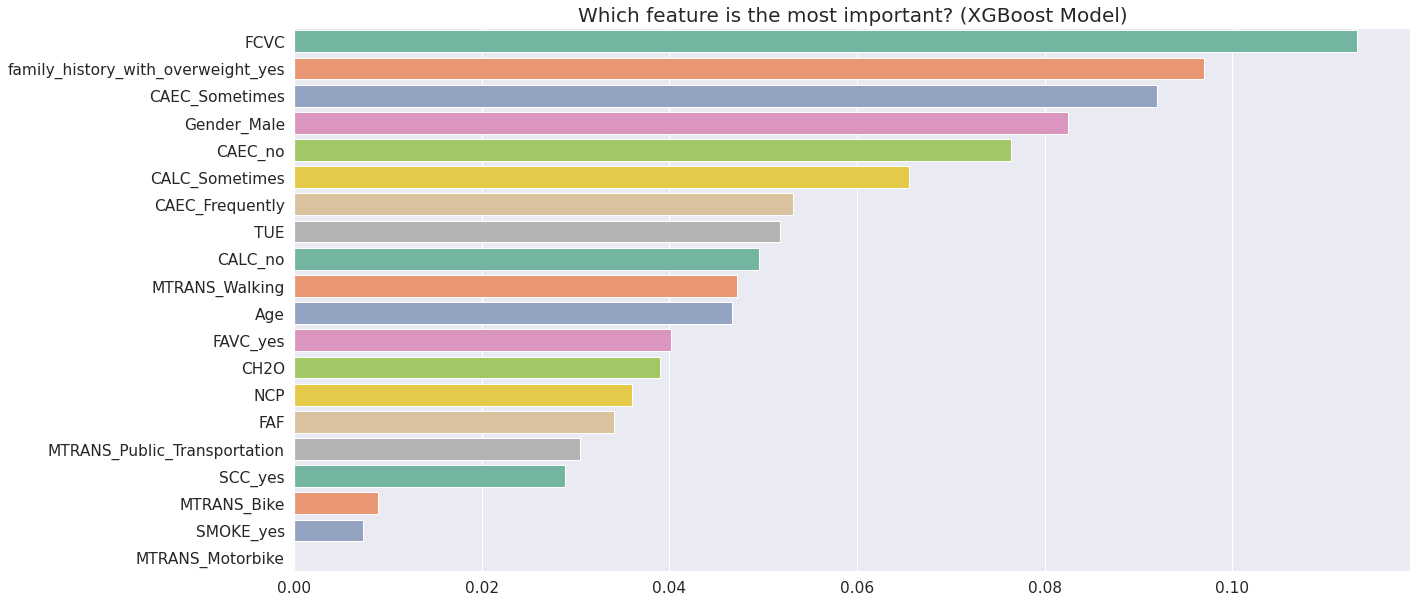

In [ ]:
# Plot features importances
imp = pd.Series(data=xgb.feature_importances_, index=X_test.columns).sort_values(ascending=False)
plt.figure(figsize=(20,10))
plt.title("Which feature is the most important? (XGBoost Model)", fontsize=20)
ax = sns.barplot(y=imp.index, x=imp.values, palette="Set2", orient='h')

#### **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred_knn = neigh.predict(X_test)

In [ ]:
knn_y_comparison=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_knn})
knn_y_comparison.head(5)

Actual            Predicted
326         Normal_Weight   Overweight_Level_I
520   Insufficient_Weight  Insufficient_Weight
165       Obesity_Type_II      Obesity_Type_II
836    Overweight_Level_I      Obesity_Type_II
2100     Obesity_Type_III     Obesity_Type_III

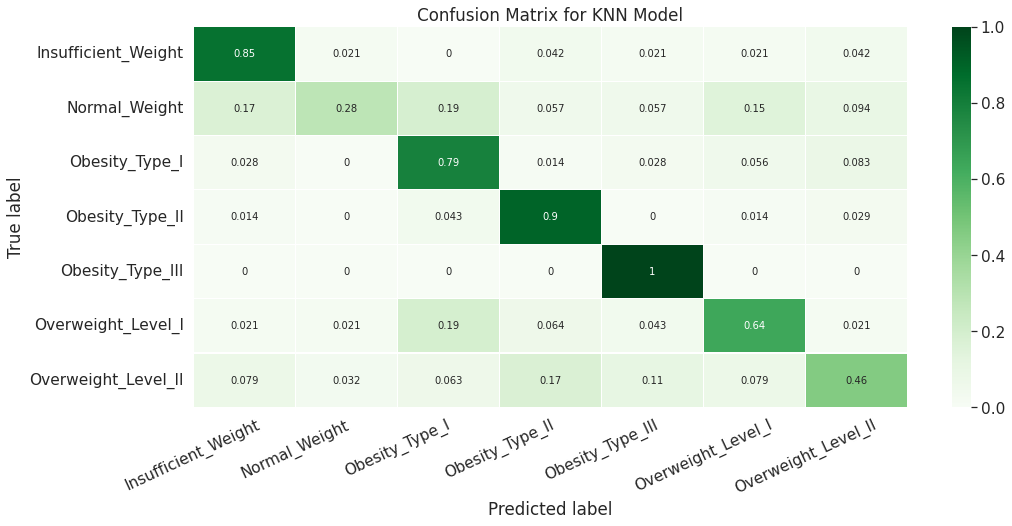

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_knn)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Insufficient_Weight','Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for KNN Model')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_knn))

                     precision    recall  f1-score   support

Insufficient_Weight       0.69      0.85      0.77        48
      Normal_Weight       0.79      0.28      0.42        53
     Obesity_Type_I       0.69      0.79      0.74        72
    Obesity_Type_II       0.76      0.90      0.82        70
   Obesity_Type_III       0.81      1.00      0.90        64
 Overweight_Level_I       0.61      0.64      0.62        47
Overweight_Level_II       0.64      0.46      0.54        63

           accuracy                           0.72       417
          macro avg       0.71      0.70      0.69       417
       weighted avg       0.72      0.72      0.70       417



#### **PCA + Random Forest**

In [ ]:
mm = MinMaxScaler()

In [ ]:
pca = PCA()
pcs_train = pca.fit_transform(mm.fit_transform(X_train))
pcs_test = pca.fit_transform(mm.fit_transform(X_test))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



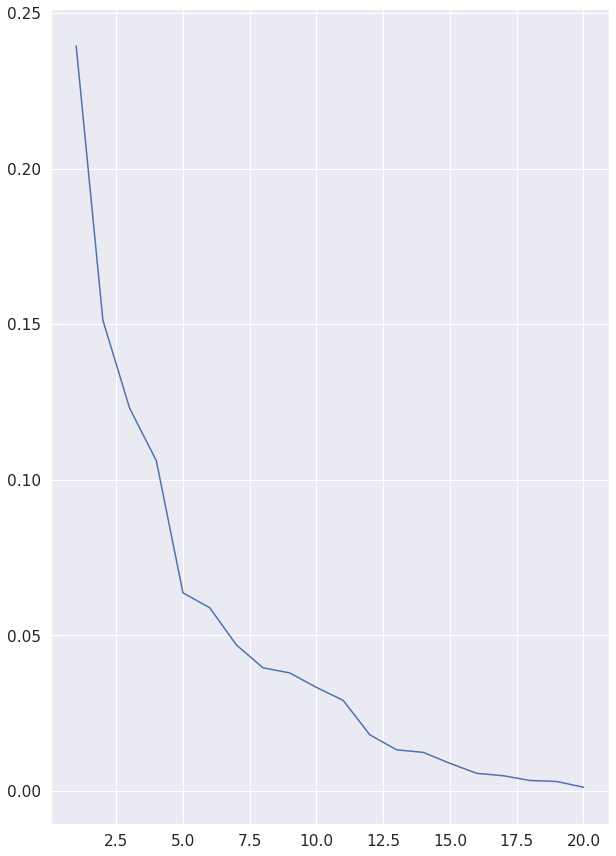

In [ ]:
varexp = pca.explained_variance_ratio_

sns.lineplot(range(1, len(varexp) + 1), varexp)

In [ ]:
pca = PCA(10)
pcs_train = pca.fit_transform(mm.fit_transform(X_train))
pcs_test = pca.fit_transform(mm.fit_transform(X_test))

In [ ]:
print(pcs_train.shape)
print(pcs_test.shape)

(1665, 10)
(417, 10)


In [ ]:
rf = RandomForestClassifier()
rf.fit(pcs_train, y_train)
y_pred_pcarf = rf.predict(pcs_test)

In [ ]:
print(classification_report(y_test, y_pred_pcarf))

                     precision    recall  f1-score   support

Insufficient_Weight       0.85      0.23      0.36        48
      Normal_Weight       0.33      0.66      0.44        53
     Obesity_Type_I       0.32      0.35      0.33        72
    Obesity_Type_II       0.67      0.29      0.40        70
   Obesity_Type_III       0.00      0.00      0.00        64
 Overweight_Level_I       0.15      0.43      0.22        47
Overweight_Level_II       0.31      0.27      0.29        63

           accuracy                           0.31       417
          macro avg       0.37      0.32      0.29       417
       weighted avg       0.37      0.31      0.29       417



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



###**After Adding Clustering Label Feature**

In [ ]:
# #Actual clustering
# kproto = KPrototypes(n_clusters= 7, init='Cao', n_jobs = -1)
# clusters = kproto.fit_predict(kprot_data, categorical=categorical_columns)

# #Prints the count of each cluster group
# pd.Series(clusters).value_counts()

In [ ]:
X_train['kproto'] = clusters_train
X_test['kproto'] = clusters_test

In [ ]:
X_train.head()

Age      FCVC  ...  MTRANS_Walking  kproto
39   -0.476570 -0.790434  ...               0       0
1158  4.890184 -0.790434  ...               0       1
1080  0.628350  1.082641  ...               0       4
1319  1.733270  0.684779  ...               0       1
1504 -0.950107 -0.191709  ...               0       4

[5 rows x 21 columns]

#### **Logistic Regression**

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
y_pred_logreg = logreg.predict(X_test)

In [ ]:
LG_y_comparison=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_logreg})
LG_y_comparison.head(5)

Actual           Predicted
326         Normal_Weight     Obesity_Type_II
520   Insufficient_Weight  Overweight_Level_I
165       Obesity_Type_II     Obesity_Type_II
836    Overweight_Level_I  Overweight_Level_I
2100     Obesity_Type_III    Obesity_Type_III

In [ ]:
confusion_matrix(y_test, y_pred_logreg)

array([[31,  6,  3,  3,  0,  5,  0],
       [18, 15,  8,  5,  0,  4,  3],
       [ 5,  2, 43, 13,  1,  6,  2],
       [ 1,  1,  1, 65,  0,  2,  0],
       [ 1,  0,  0,  0, 63,  0,  0],
       [ 0,  7, 12,  4,  3, 19,  2],
       [ 2,  5, 19, 20,  4,  0, 13]])

In [ ]:
print(classification_report(y_test, y_pred_logreg))

                     precision    recall  f1-score   support

Insufficient_Weight       0.53      0.65      0.58        48
      Normal_Weight       0.42      0.28      0.34        53
     Obesity_Type_I       0.50      0.60      0.54        72
    Obesity_Type_II       0.59      0.93      0.72        70
   Obesity_Type_III       0.89      0.98      0.93        64
 Overweight_Level_I       0.53      0.40      0.46        47
Overweight_Level_II       0.65      0.21      0.31        63

           accuracy                           0.60       417
          macro avg       0.59      0.58      0.56       417
       weighted avg       0.59      0.60      0.57       417



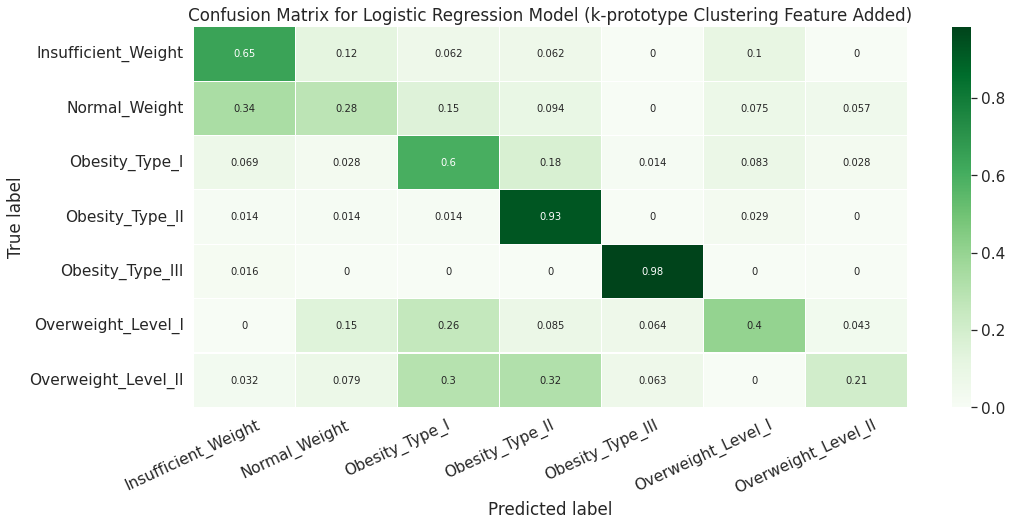

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_logreg)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Insufficient_Weight','Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression Model (k-prototype Clustering Feature Added)')
plt.show()

#### **Random Forest**

In [ ]:
#rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_rf))

                     precision    recall  f1-score   support

Insufficient_Weight       0.91      0.88      0.89        48
      Normal_Weight       0.59      0.75      0.66        53
     Obesity_Type_I       0.83      0.75      0.79        72
    Obesity_Type_II       0.85      0.94      0.89        70
   Obesity_Type_III       1.00      0.98      0.99        64
 Overweight_Level_I       0.86      0.77      0.81        47
Overweight_Level_II       0.75      0.65      0.69        63

           accuracy                           0.82       417
          macro avg       0.83      0.82      0.82       417
       weighted avg       0.83      0.82      0.82       417



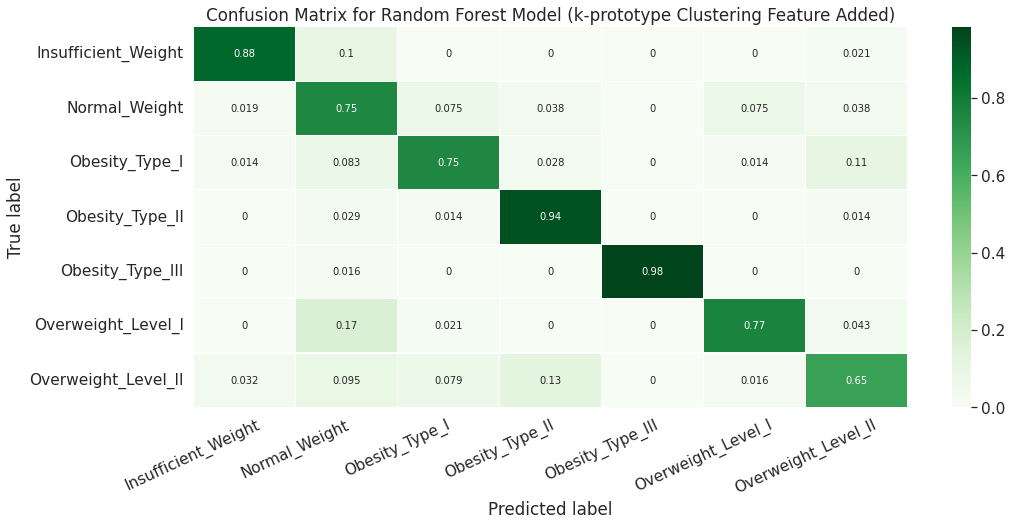

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_rf)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Insufficient_Weight','Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model (k-prototype Clustering Feature Added)')
plt.show()

#### **XGBOOST**

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_xgb))

                     precision    recall  f1-score   support

Insufficient_Weight       0.86      0.79      0.83        48
      Normal_Weight       0.62      0.79      0.69        53
     Obesity_Type_I       0.68      0.69      0.68        72
    Obesity_Type_II       0.74      0.94      0.83        70
   Obesity_Type_III       0.98      0.98      0.98        64
 Overweight_Level_I       0.76      0.53      0.62        47
Overweight_Level_II       0.71      0.51      0.59        63

           accuracy                           0.76       417
          macro avg       0.76      0.75      0.75       417
       weighted avg       0.76      0.76      0.75       417



#### **KNN**

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train, y_train)

y_pred_knn = neigh.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_knn))

                     precision    recall  f1-score   support

Insufficient_Weight       0.66      0.83      0.73        48
      Normal_Weight       0.45      0.19      0.27        53
     Obesity_Type_I       0.70      0.71      0.70        72
    Obesity_Type_II       0.65      0.80      0.72        70
   Obesity_Type_III       0.81      1.00      0.90        64
 Overweight_Level_I       0.50      0.53      0.52        47
Overweight_Level_II       0.61      0.44      0.51        63

           accuracy                           0.66       417
          macro avg       0.63      0.64      0.62       417
       weighted avg       0.64      0.66      0.63       417



#### **PCA + Random Forest**

In [ ]:
pca = PCA()

pcs_train = pca.fit_transform(mm.fit_transform(X_train))
pcs_test = pca.fit_transform(mm.fit_transform(X_test))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



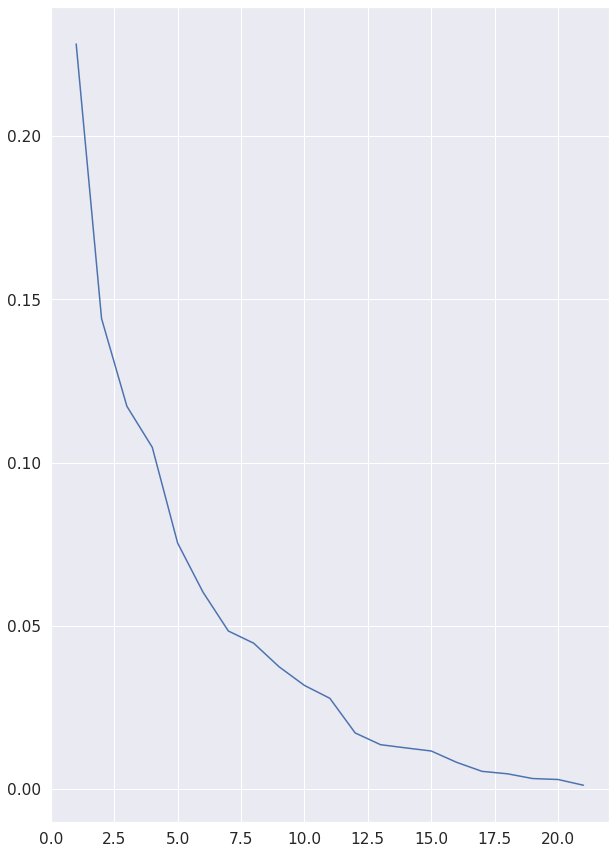

In [ ]:
varexp = pca.explained_variance_ratio_

sns.lineplot(range(1, len(varexp) + 1), varexp)

In [ ]:
pca = PCA(10)

pcs_train = pca.fit_transform(mm.fit_transform(X_train))
pcs_test = pca.fit_transform(mm.fit_transform(X_test))

In [ ]:
print(pcs_train.shape)
print(pcs_test.shape)

(1665, 10)
(417, 10)


In [ ]:
rf = RandomForestClassifier()
rf.fit(pcs_train, y_train)
y_pred_pcarf = rf.predict(pcs_test)

In [ ]:
print(classification_report(y_test, y_pred_pcarf))

                     precision    recall  f1-score   support

Insufficient_Weight       0.48      0.21      0.29        48
      Normal_Weight       0.38      0.62      0.47        53
     Obesity_Type_I       0.28      0.40      0.33        72
    Obesity_Type_II       0.32      0.13      0.18        70
   Obesity_Type_III       0.00      0.00      0.00        64
 Overweight_Level_I       0.12      0.28      0.17        47
Overweight_Level_II       0.39      0.43      0.41        63

           accuracy                           0.29       417
          macro avg       0.28      0.30      0.26       417
       weighted avg       0.28      0.29      0.26       417



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
# dementional reduction step 2 -- tsne 
tsne = TSNE()
tsne_train = tsne.fit_transform(pcs_train)
tsne_test = tsne.fit_transform(pcs_test)

# get the embeddings
#te_train = tsne_train.embedding_
#te_test = tsne_test.embedding_


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [ ]:
# the shape
print(tsne_train.shape)
print(tsne_test.shape)


(1665, 2)
(417, 2)


In [ ]:
rf = RandomForestClassifier()
rf.fit(tsne_train, y_train)
y_pred_rf_te = rf.predict(tsne_test)

In [ ]:
print(classification_report(y_test, y_pred_rf_te))

                     precision    recall  f1-score   support

Insufficient_Weight       0.10      0.17      0.12        48
      Normal_Weight       0.17      0.74      0.27        53
     Obesity_Type_I       0.17      0.01      0.03        72
    Obesity_Type_II       0.00      0.00      0.00        70
   Obesity_Type_III       0.00      0.00      0.00        64
 Overweight_Level_I       0.10      0.15      0.12        47
Overweight_Level_II       0.11      0.05      0.07        63

           accuracy                           0.14       417
          macro avg       0.09      0.16      0.09       417
       weighted avg       0.09      0.14      0.08       417



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

